In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(69)

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"

df = pd.read_csv(uri)

df.head(5)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
df.shape

(10000, 5)

In [4]:
col_name = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

df = df.rename(columns=col_name)

troca = {
    'no': 0,
    'yes': 1
}

df['vendido'] = df.vendido.map(troca)

df.head(5)

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
from datetime import datetime


df['idade_do_modelo'] = datetime.today().year - df['ano_do_modelo']

df.head(5)

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [6]:
df['km_por_ano'] = df['milhas_por_ano'] * 1.60934

df.head(5)

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [7]:
df.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1, inplace=True)

df.head(5)

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [8]:
X = df[['preco', 'idade_do_modelo', 'km_por_ano']]
y = df['vendido']

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(X, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
score = accuracy_score(teste_y, previsoes)
print(f"Score de {score*100:0.2f}")

Score de 76.00


In [11]:
model = DummyClassifier()
model.fit(treino_x, treino_y)
score = model.score(teste_x, teste_y)
print(f"Score de {score*100:0.2f}")

Score de 58.00


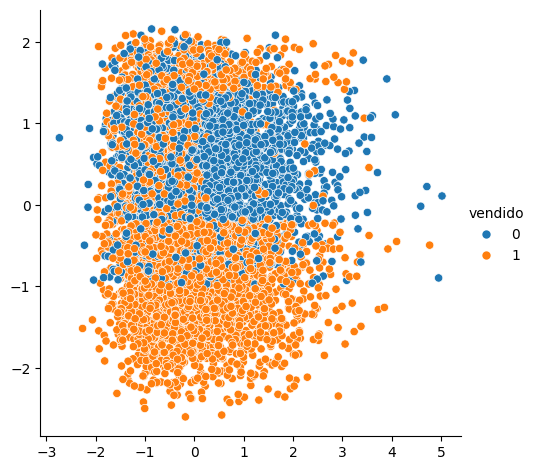

In [19]:
sns.relplot(x=treino_x[:,2], y=treino_x[:,0], hue=treino_y)